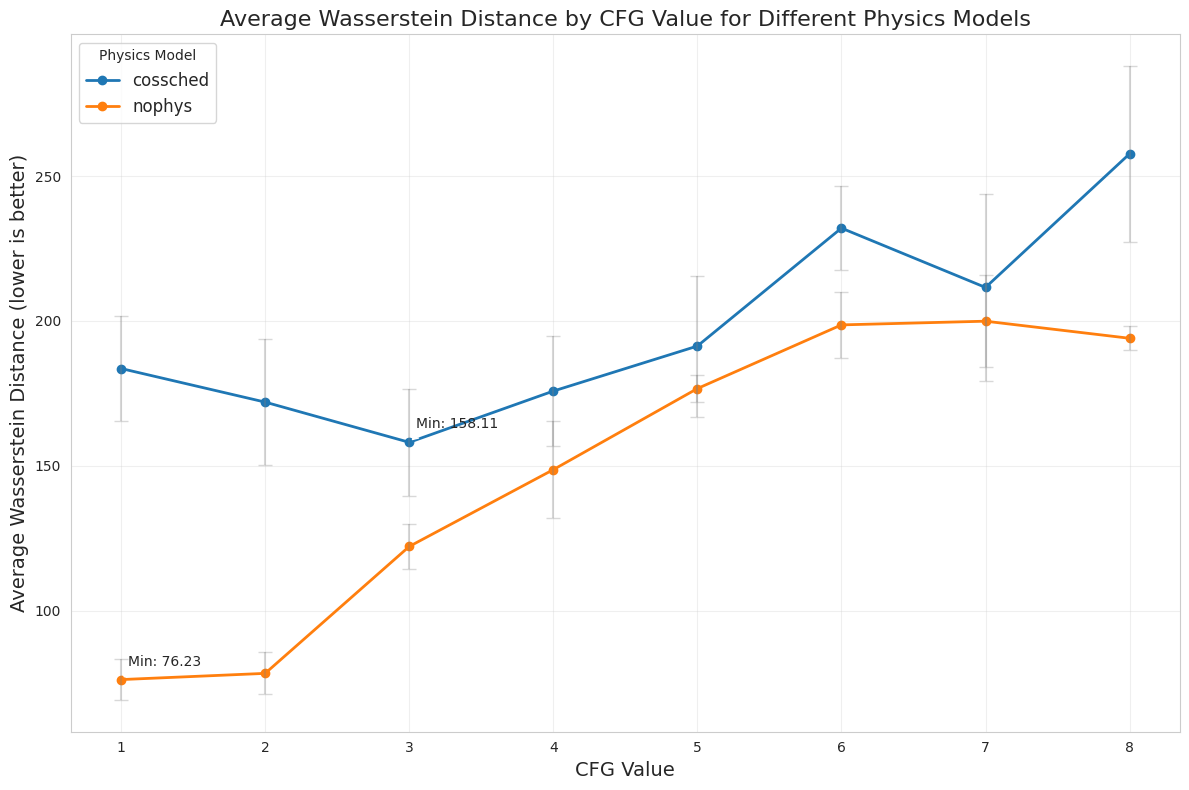

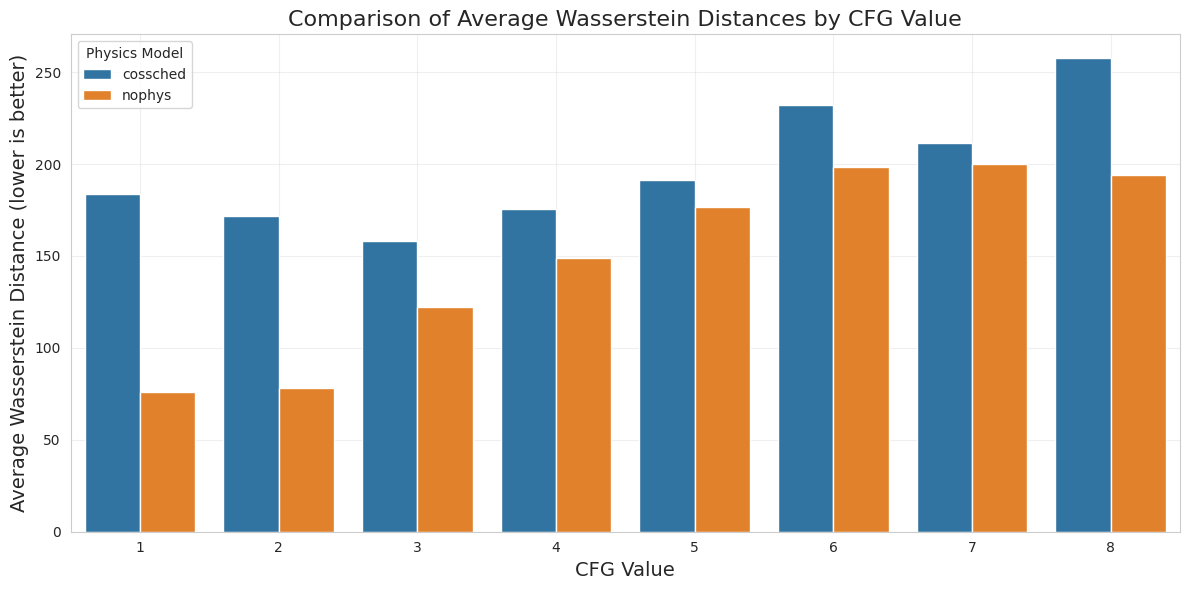

Summary Statistics:
                  mean      std       min       max
physics  cfg                                       
cossched 1    183.5838  18.0117  161.7613  207.5838
         2    171.9910  21.7936  154.7115  214.4441
         3    158.1143  18.4436  137.6678  181.9651
         4    175.7977  19.1149  152.4446  203.7479
         5    191.3374  24.3269  156.4652  228.5160
         6    232.0421  14.5625  212.6184  251.8346
         7    211.5674  32.2406  153.4863  249.9014
         8    257.6828  30.2971  223.7308  310.3101
nophys   1     76.2305   7.0552   67.4425   88.2631
         2     78.3742   7.2239   67.6889   87.8324
         3    122.1649   7.6106  109.2623  132.9615
         4    148.6780  16.7486  123.0632  168.8975
         5    176.6671   4.7745  167.6519  181.6481
         6    198.6412  11.4522  187.7125  217.6014
         7    199.9193  15.7713  177.0121  226.2875
         8    194.0213   4.0685  189.7505  200.4343


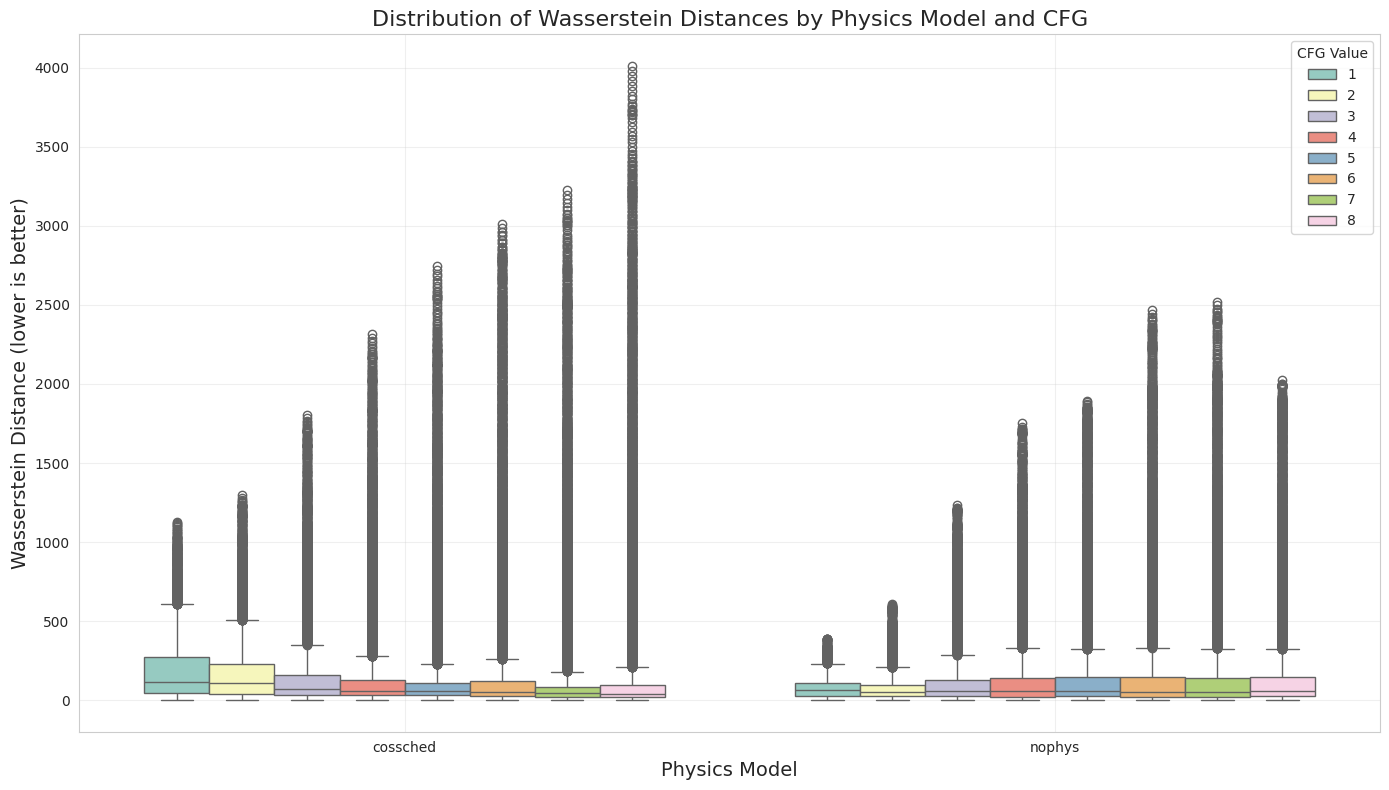

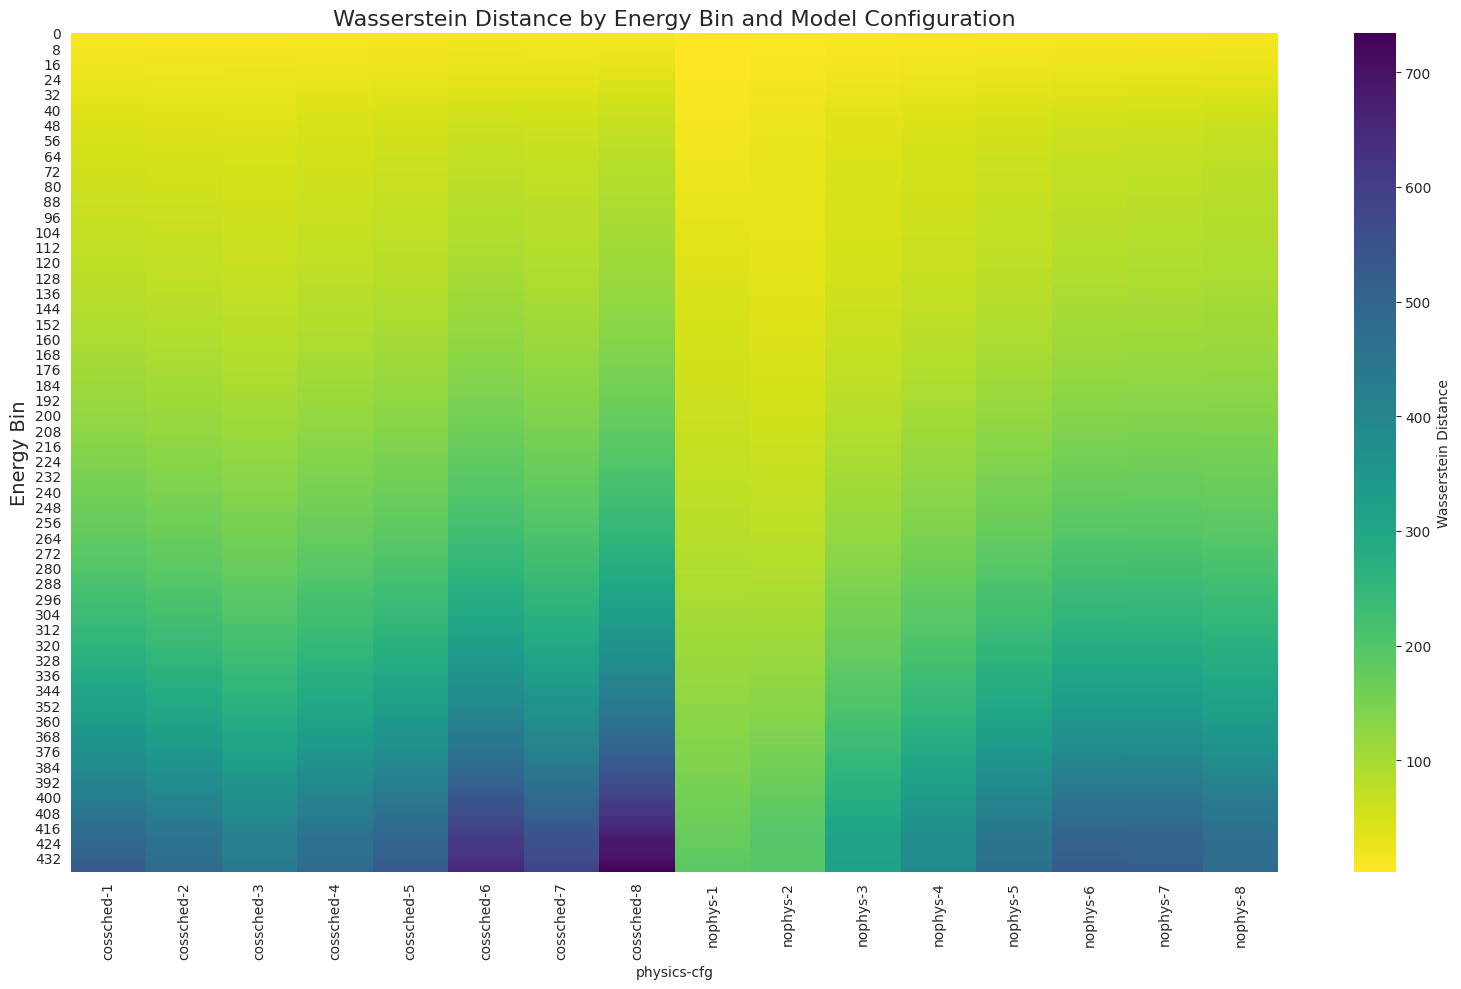

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('wasserstein_results.csv')

# Group by physics and cfg, then calculate the mean Wasserstein distance
grouped_data = df.groupby(['physics', 'cfg'])['model_avg_distance'].mean().reset_index()

# Create a pivot table for easier plotting
pivot_data = grouped_data.pivot(index='cfg', columns='physics', values='model_avg_distance')

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Plot the data
for physics in ['cossched', 'nophys']:
    # Get data for this physics type
    phys_data = grouped_data[grouped_data['physics'] == physics]
    
    # Sort by cfg
    phys_data = phys_data.sort_values('cfg')
    
    # Plot line with markers
    plt.plot(phys_data['cfg'], phys_data['model_avg_distance'], 
             marker='o', linestyle='-', linewidth=2, 
             label=physics)

# Add error bars (standard deviation)
for physics in ['cossched', 'nophys']:
    # Calculate standard deviation for each cfg value
    std_data = df[df['physics'] == physics].groupby('cfg')['model_avg_distance'].std().reset_index()
    mean_data = df[df['physics'] == physics].groupby('cfg')['model_avg_distance'].mean().reset_index()
    
    # Sort by cfg
    std_data = std_data.sort_values('cfg')
    mean_data = mean_data.sort_values('cfg')
    
    # Plot error bars
    plt.errorbar(std_data['cfg'], mean_data['model_avg_distance'], 
                 yerr=std_data['model_avg_distance'], fmt='none', 
                 alpha=0.3, capsize=5, ecolor='gray')

# Customize the plot
plt.title('Average Wasserstein Distance by CFG Value for Different Physics Models', fontsize=16)
plt.xlabel('CFG Value', fontsize=14)
plt.ylabel('Average Wasserstein Distance (lower is better)', fontsize=14)
plt.xticks(np.arange(1, 9, 1))  # Set x-ticks to whole numbers 1-8
plt.legend(title='Physics Model', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations for the lowest values (best performance)
for physics in ['cossched', 'nophys']:
    phys_data = grouped_data[grouped_data['physics'] == physics]
    min_idx = phys_data['model_avg_distance'].idxmin()
    min_cfg = phys_data.loc[min_idx, 'cfg']
    min_distance = phys_data.loc[min_idx, 'model_avg_distance']
    plt.annotate(f'Min: {min_distance:.2f}', 
                 xy=(min_cfg, min_distance),
                 xytext=(5, 10), textcoords='offset points',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Show the plot
plt.tight_layout()
plt.show()

# Create a bar plot to compare the two physics types
plt.figure(figsize=(12, 6))

# Plot grouped bar chart
sns.barplot(x='cfg', y='model_avg_distance', hue='physics', data=grouped_data)

plt.title('Comparison of Average Wasserstein Distances by CFG Value', fontsize=16)
plt.xlabel('CFG Value', fontsize=14)
plt.ylabel('Average Wasserstein Distance (lower is better)', fontsize=14)
plt.legend(title='Physics Model')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(df.groupby(['physics', 'cfg'])['model_avg_distance'].agg(['mean', 'std', 'min', 'max']).round(4))

# Optional: Create an additional plot to show bin-level Wasserstein distances
plt.figure(figsize=(14, 8))

# Create a boxplot to show distribution of Wasserstein distances by bin
sns.boxplot(x='physics', y='wasserstein_distance', hue='cfg', data=df, palette='Set3')

plt.title('Distribution of Wasserstein Distances by Physics Model and CFG', fontsize=16)
plt.xlabel('Physics Model', fontsize=14)
plt.ylabel('Wasserstein Distance (lower is better)', fontsize=14)
plt.legend(title='CFG Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Additional heatmap for bin-level analysis
# Create a pivot table aggregating wasserstein distances by bin and model type
if 'bin' in df.columns:
    bin_pivot = df.pivot_table(
        index='bin', 
        columns=['physics', 'cfg'], 
        values='wasserstein_distance',
        aggfunc='mean'
        )
    
    plt.figure(figsize=(16, 10))
    sns.heatmap(bin_pivot, annot=False, cmap='viridis_r', cbar_kws={'label': 'Wasserstein Distance'})
    plt.title('Wasserstein Distance by Energy Bin and Model Configuration', fontsize=16)
    plt.ylabel('Energy Bin', fontsize=14)
    plt.tight_layout()
    plt.show()

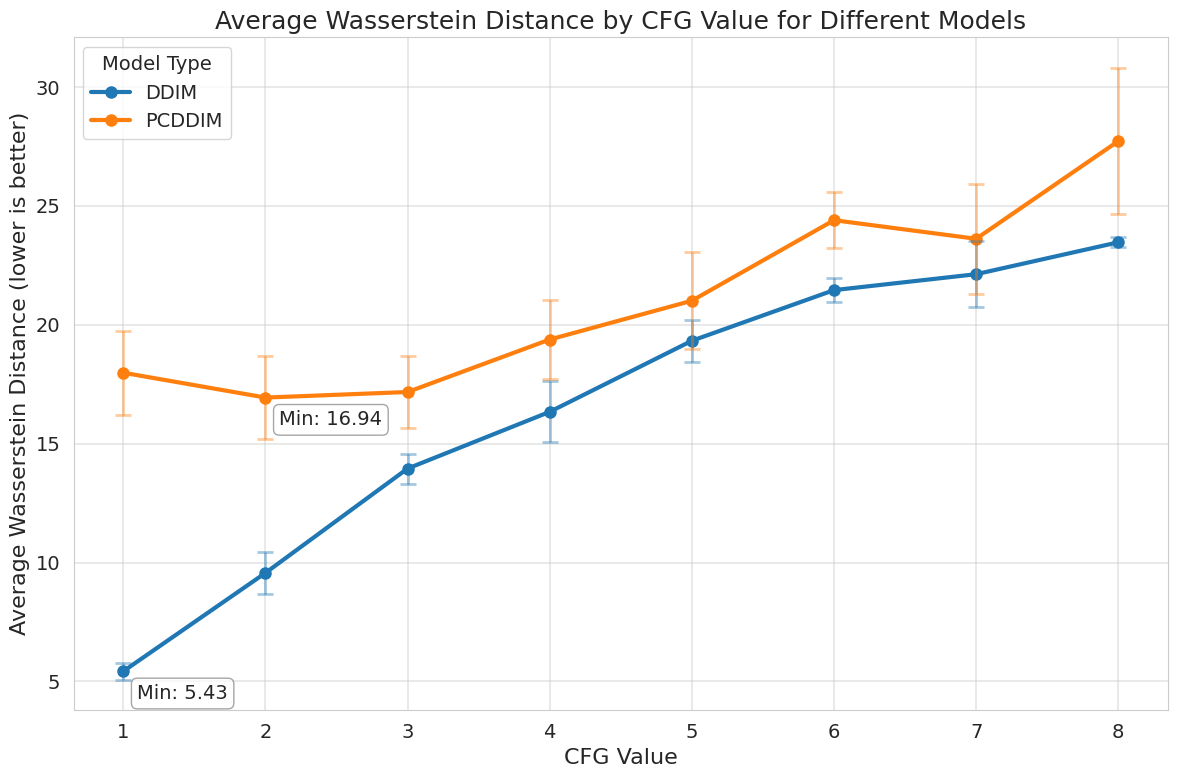

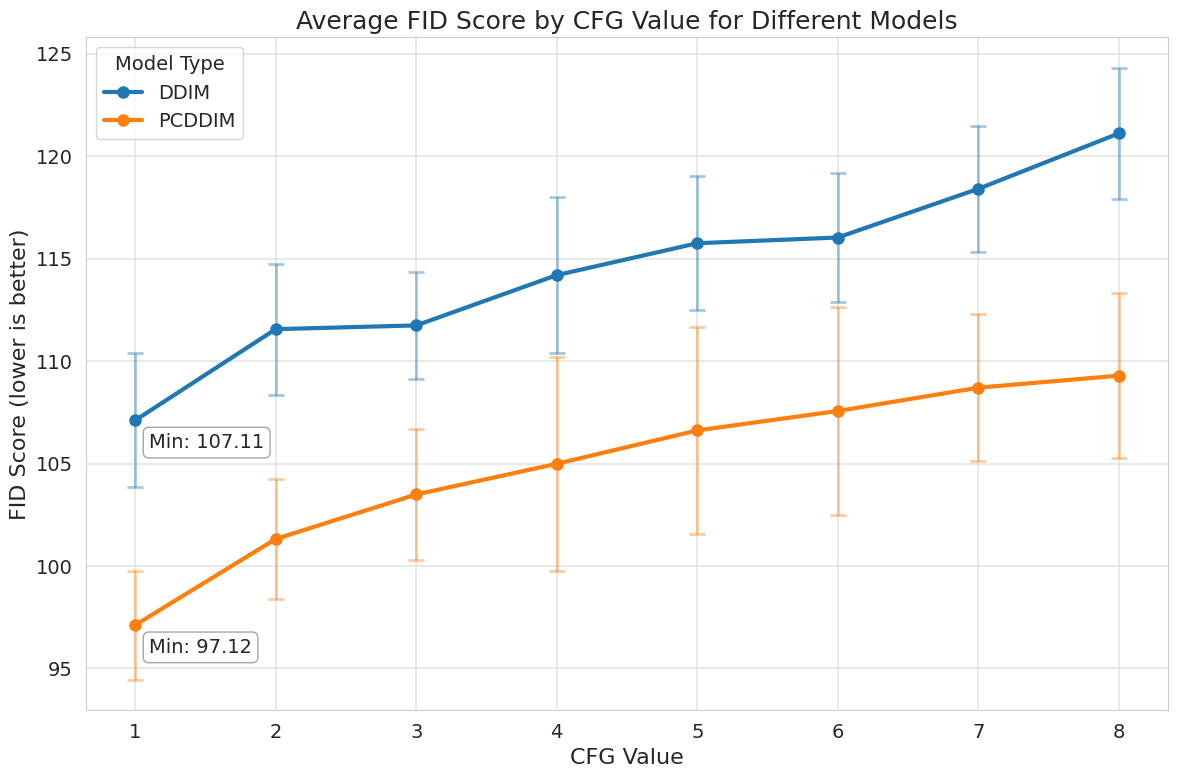

Summary statistics by model and CFG saved to 'model_metrics_summary.csv'
   model_name  cfg  mean_wasserstein  std_wasserstein  mean_fid  std_fid
0        DDIM    1              5.43             0.35    107.11     3.28
1        DDIM    2              9.56             0.87    111.56     3.20
2        DDIM    3             13.95             0.63    111.74     2.63
3        DDIM    4             16.34             1.28    114.20     3.81
4        DDIM    5             19.33             0.88    115.75     3.28
5        DDIM    6             21.46             0.51    116.03     3.15
6        DDIM    7             22.13             1.39    118.41     3.08
7        DDIM    8             23.47             0.21    121.11     3.20
8      PCDDIM    1             17.98             1.76     97.12     2.66
9      PCDDIM    2             16.94             1.76    101.32     2.95
10     PCDDIM    3             17.17             1.52    103.49     3.22
11     PCDDIM    4             19.38             1.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Increase default font sizes globally
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

# FIRST PLOT - Wasserstein Distance
# Load the data
df = pd.read_csv('wasserstein_results_30MeV.csv')

# Create a mapping dictionary to rename the physics models
model_mapping = {
    'cossched': 'PCDDIM',
    'nophys': 'DDIM'
}

# Create a new column with the mapped names (just for plotting)
df['model_name'] = df['physics'].map(model_mapping)

# Group by the new model names and cfg, then calculate the mean
grouped_data = df.groupby(['model_name', 'cfg'])['model_avg_distance'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Define colors manually to control which model gets which color
colors = {'DDIM': 'C0', 'PCDDIM': 'C1'}  # C0 is the first color, C1 is the second

# Plot the data with thicker lines
for model in ['DDIM', 'PCDDIM']:
    # Get data for this model
    model_data = grouped_data[grouped_data['model_name'] == model]
    
    # Sort by cfg
    model_data = model_data.sort_values('cfg')
    
    # Plot line with markers and thicker lines
    plt.plot(model_data['cfg'], model_data['model_avg_distance'], 
             marker='o', markersize=8, linestyle='-', linewidth=3, 
             label=model, color=colors[model])

# Add error bars
for model in ['DDIM', 'PCDDIM']:
    # Map back to the original physics name for filtering
    physics = 'nophys' if model == 'DDIM' else 'cossched'
    
    # Calculate standard deviation for each cfg value
    std_data = df[df['physics'] == physics].groupby('cfg')['model_avg_distance'].std().reset_index()
    mean_data = df[df['physics'] == physics].groupby('cfg')['model_avg_distance'].mean().reset_index()
    
    # Sort by cfg
    std_data = std_data.sort_values('cfg')
    mean_data = mean_data.sort_values('cfg')
    
    # Plot error bars with thicker lines
    plt.errorbar(std_data['cfg'], mean_data['model_avg_distance'], 
                 yerr=std_data['model_avg_distance'], fmt='none', 
                 alpha=0.4, capsize=6, ecolor=colors[model], elinewidth=2, capthick=2)

# Customize the plot
plt.title('Average Wasserstein Distance by CFG Value for Different Models', fontsize=18)
plt.xlabel('CFG Value', fontsize=16)
plt.ylabel('Average Wasserstein Distance (lower is better)', fontsize=16)
plt.xticks(np.arange(1, 9, 1))
plt.legend(title='Model Type', title_fontsize=14, fontsize=14)

# Make grid lines thicker
plt.grid(True, alpha=0.5, linewidth=1.2)

# Make the tick lines thicker and longer
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6)

# Add annotations for the lowest values with larger text (no arrows)
for model in ['DDIM', 'PCDDIM']:
    model_data = grouped_data[grouped_data['model_name'] == model]
    min_idx = model_data['model_avg_distance'].idxmin()
    min_cfg = model_data.loc[min_idx, 'cfg']
    min_distance = model_data.loc[min_idx, 'model_avg_distance']
    plt.annotate(f'Min: {min_distance:.2f}', 
                 xy=(min_cfg, min_distance),
                 xytext=(10, -20), textcoords='offset points',
                 fontsize=14,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

plt.tight_layout()
plt.show()

# SECOND PLOT - FID Score
# Load the data from the CSV file
fid_df = pd.read_csv('metrics_600e.csv')

# Create a new column with the mapped names
fid_df['model_name'] = fid_df['Physics'].map(model_mapping)

# Group by model_name and CFG, then calculate mean FID
fid_grouped = fid_df.groupby(['model_name', 'CFG'])['FID'].mean().reset_index()

# Set up the second plot
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# Plot the FID data with thicker lines
for model in ['DDIM', 'PCDDIM']:
    model_data = fid_grouped[fid_grouped['model_name'] == model]
    model_data = model_data.sort_values('CFG')
    
    plt.plot(model_data['CFG'], model_data['FID'], 
             marker='o', markersize=8, linestyle='-', linewidth=3, 
             label=model, color=colors[model])

# Add error bars for FID data
for model in ['DDIM', 'PCDDIM']:
    physics = 'nophys' if model == 'DDIM' else 'cossched'
    
    # Get data for this physics type and calculate std dev
    model_fid_data = fid_df[fid_df['Physics'] == physics]
    std_data = model_fid_data.groupby('CFG')['FID'].std().reset_index()
    mean_data = model_fid_data.groupby('CFG')['FID'].mean().reset_index()
    
    # Sort by CFG
    std_data = std_data.sort_values('CFG')
    mean_data = mean_data.sort_values('CFG')
    
    # For CFGs with only one data point, std will be NaN, so we replace with 0
    std_data['FID'] = std_data['FID'].fillna(0)
    
    # Plot error bars with thicker lines
    plt.errorbar(std_data['CFG'], mean_data['FID'], 
                 yerr=std_data['FID'], fmt='none', 
                 alpha=0.4, capsize=6, ecolor=colors[model], elinewidth=2, capthick=2)

# Customize the plot
plt.title('Average FID Score by CFG Value for Different Models', fontsize=18)
plt.xlabel('CFG Value', fontsize=16)
plt.ylabel('FID Score (lower is better)', fontsize=16)
plt.xticks(np.arange(1, 9, 1))
plt.legend(title='Model Type', title_fontsize=14, fontsize=14)

# Make grid lines thicker
plt.grid(True, alpha=0.5, linewidth=1.2)

# Make the tick lines thicker and longer
plt.tick_params(axis='both', which='major', labelsize=14, width=2, length=6)

# Add annotations for the lowest values (no arrows)
for model in ['DDIM', 'PCDDIM']:
    model_data = fid_grouped[fid_grouped['model_name'] == model]
    min_idx = model_data['FID'].idxmin()
    min_cfg = model_data.loc[min_idx, 'CFG']
    min_fid = model_data.loc[min_idx, 'FID']
    plt.annotate(f'Min: {min_fid:.2f}', 
                 xy=(min_cfg, min_fid),
                 xytext=(10, -20), textcoords='offset points',
                 fontsize=14,
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7))

plt.tight_layout()
plt.show()

import pandas as pd

# Load datasets
wass_df = pd.read_csv('wasserstein_results_30MeV.csv')
fid_df = pd.read_csv('metrics_600e.csv')

# Create a mapping dictionary to rename the physics models
model_mapping = {
    'cossched': 'PCDDIM',
    'nophys': 'DDIM'
}

# Add model name columns to both datasets
wass_df['model_name'] = wass_df['physics'].map(model_mapping)
fid_df['model_name'] = fid_df['Physics'].map(model_mapping)

# Calculate mean Wasserstein distance per model and CFG
wass_summary = wass_df.groupby(['model_name', 'cfg'])['model_avg_distance'].agg(['mean', 'std']).reset_index()
wass_summary.columns = ['model_name', 'cfg', 'mean_wasserstein', 'std_wasserstein']

# Calculate mean FID per model and CFG
fid_summary = fid_df.groupby(['model_name', 'CFG'])['FID'].agg(['mean', 'std']).reset_index()
fid_summary.columns = ['model_name', 'cfg', 'mean_fid', 'std_fid']

# Merge the two summaries
merged_summary = pd.merge(wass_summary, fid_summary, on=['model_name', 'cfg'], how='outer')

# Rearrange columns for better readability
merged_summary = merged_summary[['model_name', 'cfg', 'mean_wasserstein', 'std_wasserstein', 'mean_fid', 'std_fid']]

# Sort by model name and CFG
merged_summary = merged_summary.sort_values(['model_name', 'cfg'])

# Round to 2 decimal places for better readability
merged_summary = merged_summary.round(2)

# Save to CSV
merged_summary.to_csv('model_metrics_summary.csv', index=False)

print("Summary statistics by model and CFG saved to 'model_metrics_summary.csv'")
print(merged_summary)